<a href="https://colab.research.google.com/github/gorbo96/Simulacion/blob/main/simpyInterrupciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 

In [3]:
AFORO=300
CONTAGIO=30
MED_PROB_CONT=43
TIEMPO_SIMULACION = 30
UNIVERSO=AFORO*TIEMPO_SIMULACION
CONTG={}

In [4]:
p =  CONTAGIO/100  
bernoulli = stats.bernoulli(p)
aleatorios = bernoulli.rvs(UNIVERSO)

In [5]:
contagios=stats.bernoulli(MED_PROB_CONT/100)
listcontagios=contagios.rvs(AFORO)

In [6]:
class Instituto(object):    
  def __init__(self, environment, aforo):        
    self.env=environment
    self.aforo = simpy.Resource(environment, aforo)    
      
  def asistencia_alumno(self, alumno, id,contagio):
    if(alumno==0):
      aleatorios[id]=contagio
    yield self.env.timeout(1)
    
def llegada_establecimineto(env, alumno, id, contagio, instituto):
  
  with instituto.aforo.request() as aforo:        
      yield aforo
      yield env.process(instituto.asistencia_alumno(alumno,id,contagio))
       

def ejecutar_simulacion(env):
  instituto=Instituto(env, AFORO)
  for k in range(AFORO):
    env.process(llegada_establecimineto(env, aleatorios[k],k,listcontagios[k],instituto))
  CONTADOR=1
  while True:
    i=0
    for k in range(AFORO*CONTADOR,AFORO*(CONTADOR+1),1):
      env.process(llegada_establecimineto(env, aleatorios[k],k,listcontagios[i],instituto))
      i+=1
    if(CONTADOR==(TIEMPO_SIMULACION-1)):
      CONTADOR=0
    else:
      CONTADOR+=1
    t=env.now
    CONTG[t]=aleatorios.tolist().count(1)
    yield env.timeout(1)
env=simpy.Environment()
env.process(ejecutar_simulacion(env))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


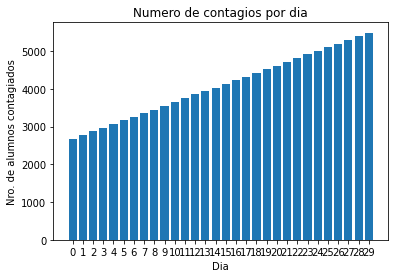

In [7]:
etiqueta = list(CONTG.keys())
valores = list(CONTG.values())
plt.bar(range(len(CONTG)), valores, align="center", tick_label=etiqueta)
plt.title("Numero de contagios por dia")
plt.xlabel("Dia")
plt.ylabel("Nro. de alumnos contagiados")
plt.show()